In [1]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09405801936973575
gamma = 1.004453024014182

I=0.6
L = 2.5 # m cooler length
r_beam=25*1e-3



T_perp = 0.1 # <E> [eV] = kb*T
T_l =  0.01 # <E> [eV]
B = 0.075 # T for LEIR
Z=54

mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

length = 78.54370266 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T



beta_x=5
beta_y=5
emittance=14*1e-6






num_particles=int(1e5)

#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),





/home/pkruyt/cernbox/xsuite/xtrack/ducktrack/elements.py:891: RuntimeWarning: invalid value encountered in true_divide
  p.theta = np.arctan(p.y/p.x)


p.px [ 0.01078585 -0.00344002  0.00714054 ...  0.01016378 -0.01190667
 -0.00557594]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]


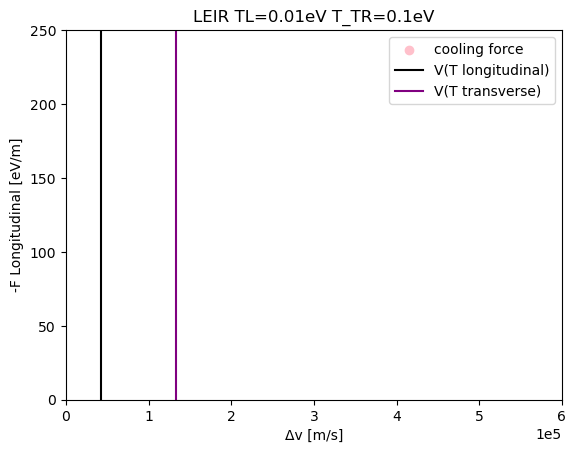

In [2]:
#force againt velocity


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=np.random.normal(0,0 ,num_particles),
    px=np.random.normal(0, 4*np.sqrt(emittance/beta_x), num_particles),
    y=0,
    py=0,
    delta=0,
    zeta=0)



dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                B=B,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


force = dtk_cooler.force(dtk_particle)

def temperature_to_velocity_1D(temperature_eV):
    
    T=temperature_eV#J
    mass = 511 *1e3
    velocity = c*np.sqrt( T/ mass)
    return velocity


px_tot = p0c*dtk_particle.px
beta_diff = px_tot/(mass0*gamma)
v_diff = beta_diff*c


plt.figure()
plt.scatter(v_diff,-force,color='pink',label='cooling force')
plt.axvline(temperature_to_velocity_1D(T_l),color='black',label='V(T longitudinal)')
plt.axvline(temperature_to_velocity_1D(T_perp),color='purple',label='V(T transverse)')
plt.xlim([0,6*1e5])
plt.ylim([0,250])
plt.title(f'LEIR TL={T_l}eV T_TR={T_perp}eV')
plt.legend()
plt.ylabel('-F Longitudinal [eV/m]')
plt.xlabel('Δv [m/s]')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.show()


p.px [-0.00130018 -0.00534638  0.00082512 ... -0.00697873  0.00047355
  0.00167499]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00130018 -0.00534638  0.00082512 ... -0.00697873  0.00047355
  0.00167499]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00130018 -0.00534638  0.00082512 ... -0.00697873  0.00047355
  0.00167499]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00130018 -0.00534638  0.00082512 ... -0.00697873  0.00047355
  0.00167499]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00130018 -0.00534638  0.00082512 ... -0.00697873  0.00047355
  0.00167499]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00130018 -0.00534638  0.00082512 ... -0.00697873  0.00047355
  0.00167499]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]


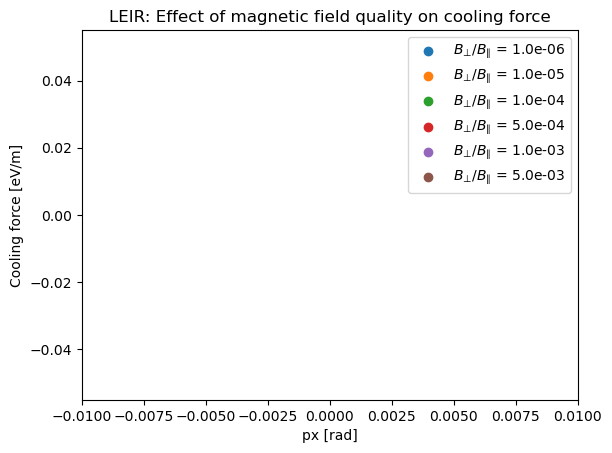

In [3]:
#Magnetic field quality

B_ratios = [1e-6,1e-5,1e-4,5e-4,1e-3,5e-3]


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=np.random.normal(0,0 ,num_particles),
    px=np.random.normal(0, 4*np.sqrt(emittance/beta_x), num_particles),
    y=0,
    py=0,
    delta=0,
    zeta=0)


for B_ratio2 in B_ratios:

    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                B=B,Z=Z,B_ratio=B_ratio2,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


    force = dtk_cooler.force(dtk_particle)

    plt.scatter(dtk_particle.px,-force, label=f"$B_{'⊥'}$/$B_{'∥'}$ = {B_ratio2:.1e}")

    plt.xlabel("px [rad]")
    plt.ylabel("Cooling force [eV/m]")
    plt.title('LEIR: Effect of magnetic field quality on cooling force')
    plt.xlim([-0.01,0.01])
    plt.legend()

p.px [ 0.00461435 -0.00017023  0.01066362 ...  0.00286079 -0.00894556
  0.0003004 ]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [ 0.00461435 -0.00017023  0.01066362 ...  0.00286079 -0.00894556
  0.0003004 ]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [ 0.00461435 -0.00017023  0.01066362 ...  0.00286079 -0.00894556
  0.0003004 ]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [ 0.00461435 -0.00017023  0.01066362 ...  0.00286079 -0.00894556
  0.0003004 ]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [ 0.00461435 -0.00017023  0.01066362 ...  0.00286079 -0.00894556
  0.0003004 ]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [ 0.00461435 -0.00017023  0.01066362 ...  0.00286079 -0.00894556
  0.0003004 ]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]


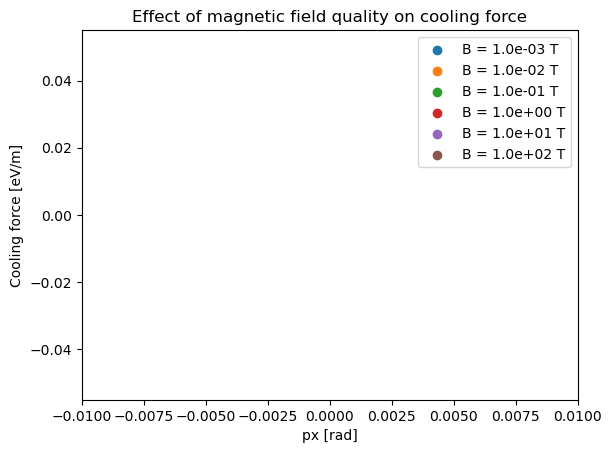

In [4]:
#Magnetic field strength

B_values = [1e-3,1e-2,1e-1,1,1e1,1e2]


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=np.random.normal(0,0 ,num_particles),
    px=np.random.normal(0, 4*np.sqrt(emittance/beta_x), num_particles),
    y=0,
    py=0,
    delta=0,
    zeta=0)


for B2 in B_values:

    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                B=B2,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


    force = dtk_cooler.force(dtk_particle)

    plt.scatter(dtk_particle.px,-force, label=f"B = {B2:.1e} T")

    plt.xlabel("px [rad]")
    plt.ylabel("Cooling force [eV/m]")
    plt.title('Effect of magnetic field quality on cooling force')
    plt.xlim([-0.01,0.01])
    plt.legend()

p.px [-0.00028233 -0.00091478 -0.00453971 ... -0.00217249  0.00381046
 -0.00705877]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00028233 -0.00091478 -0.00453971 ... -0.00217249  0.00381046
 -0.00705877]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00028233 -0.00091478 -0.00453971 ... -0.00217249  0.00381046
 -0.00705877]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [-0.00028233 -0.00091478 -0.00453971 ... -0.00217249  0.00381046
 -0.00705877]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]


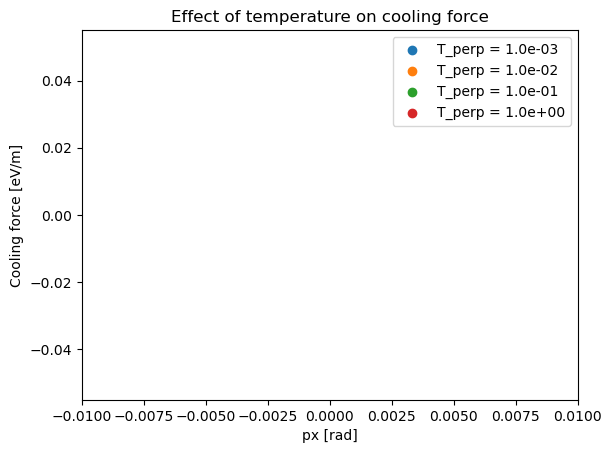

In [5]:
#Magnetic field strength

T_values = [1e-3,1e-2,1e-1,1]


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=np.random.normal(0,0 ,num_particles),
    px=np.random.normal(0, 4*np.sqrt(emittance/beta_x), num_particles),
    y=0,
    py=0,
    delta=0,
    zeta=0)


for T_perp2 in T_values:

    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp2,T_l=T_l,
                                                B=0.075,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


    force = dtk_cooler.force(dtk_particle)

    plt.scatter(dtk_particle.px,-force, label=f"T_perp = {T_perp2:.1e}")

    plt.xlabel("px [rad]")
    plt.ylabel("Cooling force [eV/m]")
    plt.title('Effect of temperature on cooling force')
    plt.xlim([-0.01,0.01])
    plt.legend()

p.px [0.0130581  0.00870049 0.00181529 ... 0.01079668 0.01272223 0.00868016]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [0.0130581  0.00870049 0.00181529 ... 0.01079668 0.01272223 0.00868016]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [0.0130581  0.00870049 0.00181529 ... 0.01079668 0.01272223 0.00868016]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]
p.px [0.0130581  0.00870049 0.00181529 ... 0.01079668 0.01272223 0.00868016]
machine_v 28197884.821464688
p.delta 0
dVx [nan nan nan ... nan nan nan]


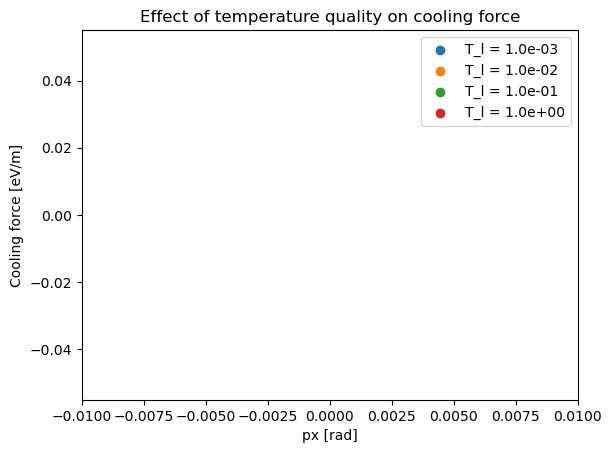

In [6]:
#Magnetic field strength

T_values = [1e-3,1e-2,1e-1,1]


dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=np.random.normal(0,0 ,num_particles),
    px=np.random.normal(0, 4*np.sqrt(emittance/beta_x), num_particles),
    y=0,
    py=0,
    delta=0,
    zeta=0)


for T_l2 in T_values:

    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l2,
                                                B=0.075,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


    force = dtk_cooler.force(dtk_particle)

    plt.scatter(dtk_particle.px,-force, label=f"T_l = {T_l2:.1e}")

    plt.xlabel("px [rad]")
    plt.ylabel("Cooling force [eV/m]")
    plt.title('Effect of temperature quality on cooling force')
    plt.xlim([-0.01,0.01])
    plt.legend()